In [ ]:
import os
import glob
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

# ▶ IMPORTATION DE DONNEE

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1ib6KiY4k4Wtv7I9p02sidhS_LygtIQeB&export=download;
!unzip -q /content/image_classification.zip ;

Downloading...
From: https://drive.google.com/u/0/uc?id=1ib6KiY4k4Wtv7I9p02sidhS_LygtIQeB
To: /content/image_classification.zip
100% 146M/146M [00:02<00:00, 68.1MB/s]


# fonction

In [ ]:
def loadAllImage(folder):
  result=[]
  for label in folder:
    for img in os.listdir(label):
      gray_image = cv2.imread(label+"/"+img)
      result.append(gray_image)
  return result

In [ ]:
def ImageToGray(images):
  return np.array([ cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in images])

In [ ]:
def InitializeTarget(folder):
  result=[]
  for i,label in enumerate(folder):
    dict={}
    temp_label=label.split('/')[-1]
    for img in os.listdir(label):
      dict[temp_label]=i
      result.append(dict)
  return np.array(result)

In [ ]:
#cette fonction va compter le nombre d'image dans le dossier test et train
def countNumberImage(folder):
  c=0
  for label in folder:
    count_label=0
    for img in os.listdir(label):
      c=c+1
      count_label=count_label+1
    print("{0} -> {1}".format(label,count_label))
  return c

In [ ]:
#def ImageToEqualize(images):
  #return np.array([cv2.equalizeHist(img) for img in images])

In [ ]:
def flattenImage(images):
  return np.array([image.flatten() for image in images])

In [ ]:
def normalizeImages(images):
  return np.array([image/255 for image in images])

In [ ]:
def VizualizeImages(images,y):
  # fig, axes = plt.subplots(5, 2, figsize=(10, 10))
  #  # Loop through the folders and randomly select and display one image from each folder
  start=0
  end=5000
  for i in range(10):
    random_index = random.randint(start,end)
    start=end
    end=end+5000
    title=y[i]
    cv2_imshow(images[random_index])
  #   ax.set_title(title)  # Set the image file name as the title
  # plt.tight_layout()
  # plt.show()

In [ ]:
def NormalizeAllData(folder,y_target):
  images=loadAllImage(folder)
  print("--------- IMAGE GRAY-------------")
  label_gray= ImageToGray(images)
  VizualizeImages(label_gray,y_target)
  print("--------- IMAGE APRES HISTOGRAMME-------------")
  # label_equalize = ImageToEqualize(label_gray)
  # VizualizeImages(label_equalize,y_target)
  imageflatten = flattenImage(label_gray)
  normalize = normalizeImages(imageflatten)
  return np.array(normalize)

# ▶ EXPLORATION DE DONNE

In [ ]:
baseUrlTrain="cifar10/train"
baseUrlTest="cifar10/test"
newFolderEdit="new_cifar10"

In [ ]:
labels = os.listdir(baseUrlTrain)
labels.sort()

In [ ]:
subdirs_test = [os.path.join(baseUrlTest,d) for d in labels if os.path.isdir(os.path.join(baseUrlTest,d))]
subdirs_train  = [os.path.join(baseUrlTrain,d) for d in labels if os.path.isdir(os.path.join(baseUrlTrain,d))]
print(subdirs_test)
print(subdirs_train)

['cifar10/test/airplane', 'cifar10/test/automobile', 'cifar10/test/bird', 'cifar10/test/cat', 'cifar10/test/deer', 'cifar10/test/dog', 'cifar10/test/frog', 'cifar10/test/horse', 'cifar10/test/ship', 'cifar10/test/truck']
['cifar10/train/airplane', 'cifar10/train/automobile', 'cifar10/train/bird', 'cifar10/train/cat', 'cifar10/train/deer', 'cifar10/train/dog', 'cifar10/train/frog', 'cifar10/train/horse', 'cifar10/train/ship', 'cifar10/train/truck']


In [ ]:
target = InitializeTarget(subdirs_train)

In [ ]:
data = [dict(s) for s in set(frozenset(d.items()) for d in target)]

In [ ]:
y_target=sorted(data, key=lambda x: list(x.values())[0])
print("class =>",y_target)

class => [{'airplane': 0}, {'automobile': 1}, {'bird': 2}, {'cat': 3}, {'deer': 4}, {'dog': 5}, {'frog': 6}, {'horse': 7}, {'ship': 8}, {'truck': 9}]


In [ ]:
print("on a {0} image pour le donnee d'train ".format(countNumberImage(subdirs_test)))
print("on a {0} image pour le donnee de entrainement ".format(countNumberImage(subdirs_train)))

cifar10/test/airplane -> 1000
cifar10/test/automobile -> 1000
cifar10/test/bird -> 1000
cifar10/test/cat -> 1000
cifar10/test/deer -> 1000
cifar10/test/dog -> 1000
cifar10/test/frog -> 1000
cifar10/test/horse -> 1000
cifar10/test/ship -> 1000
cifar10/test/truck -> 1000
on a 10000 image pour le donnee d'train 
cifar10/train/airplane -> 5000
cifar10/train/automobile -> 5000
cifar10/train/bird -> 5000
cifar10/train/cat -> 5000
cifar10/train/deer -> 5000
cifar10/train/dog -> 5000
cifar10/train/frog -> 5000
cifar10/train/horse -> 5000
cifar10/train/ship -> 5000
cifar10/train/truck -> 5000
on a 50000 image pour le donnee de entrainement 


L'ensemble de données CIFAR-10 se compose de 60 000 images couleur 32 x 32 réparties en 10 classes, avec 6 000 images par classe. Il existe 50 000 images de formation et 10 000 images de test.

L'ensemble de données est divisé en cinq lots de formation et un lot de test, chacun contenant 10 000 images. Le lot de test contient exactement 1 000 images sélectionnées au hasard dans chaque classe. Les lots de formation contiennent les images restantes dans un ordre aléatoire, mais certains lots de formation peuvent contenir plus d'images d'une classe que d'une autre. Entre eux, les lots de formation contiennent exactement 5 000 images de chaque classe.

Les classes d'étiquettes dans l'ensemble de données sont:

*   airplane
*   automobile
*   bird
*   cat
*   deer
*   dog
*   frog
*   horse
*   ship
*   truck

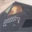

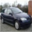

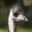

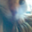

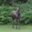

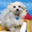

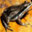

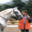

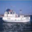

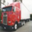

In [ ]:
VizualizeImages(loadAllImage(subdirs_train),y_target)

# PRE-TRAITEMENT DE DONNE

D'aprés l"exploration de donnée, on constate que les image sont des images en couleur, c'est à dire que type RGB(trois dimension) . Donc pour bien traité ces images on les transforme  en image gris , l'image est en une seule dimension .

--------- IMAGE GRAY-------------


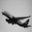

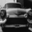

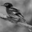

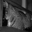

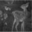

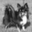

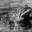

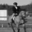

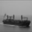

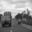

--------- IMAGE APRES HISTOGRAMME-------------


In [ ]:
X = NormalizeAllData(subdirs_train,y_target)

In [ ]:
y = [list(d.values())[0] for d in target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODEL DE SELECTION

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=42)

## Random baseline

In [ ]:
# Définir les paramètres que vous souhaitez tester
space_random = {
    'strategy': ['uniform', 'most_frequent', 'stratified']
}
# Créer un DummyClassifier
dummy_clf = DummyClassifier()

# define search
search_random = RandomizedSearchCV(dummy_clf, space_random, n_iter=3, scoring='accuracy', n_jobs=-1, cv=kf, random_state=0)
result_random = search_random.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result_random.best_score_)
print('Best Hyperparameters: %s' % result_random.best_params_)
# Évaluer la précision sur l'ensemble de test
y_pred_random = result_random.predict(X_test)
accuracy_random= accuracy_score(y_test, y_pred_random)
print(f'Précision sur l\'ensemble de test: {accuracy_random}')

Best Score: 0.09934275934307145
Best Hyperparameters: {'strategy': 'stratified'}
Précision sur l'ensemble de test: 0.0976


## Multinomial logistic regression

Quelque explication pour les valeurs des hyperparametre


1.   Solver

   **lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)**
    
    C'est une méthode quasi-Newton utilisant une approximation limitée de la matrice hessienne.
    Elle fonctionne bien pour les ensembles de données de taille moyenne à grande.
    Convient pour la régularisation "l2".

    **sag (Stochastic Average Gradient Descent)**

    Cet algorithme est une variante de la descente de gradient stochastique.
    Il est efficace pour les ensembles de données volumineux.
    Convient pour la régularisation "l2".

    **saga**

    Il s'agit d'une variante du SAG qui prend également en charge la régularisation "l1".
    Comme sag, il est efficace pour les ensembles de données volumineux.
    Convient pour les régularisations "l1" et "l2".

2.  C

    Inverse de la force de régularisation.
    Plus la valeur de C est petite, plus la régularisation est forte.

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.0001],
    'solver': ['sag', 'saga','newton-cg'],
}
# Create a Logistic Regression model
logreg = LogisticRegression(verbose=1,multi_class='multinomial',penalty='l2',max_iter=800)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("best parametre",best_params)
# Fit the model with the best hyperparameters
y_pred_log = grid_search.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Précision sur l\'ensemble de test: {accuracy_log}')

convergence after 17 epochs took 18 seconds
convergence after 17 epochs took 17 seconds
convergence after 57 epochs took 77 seconds
convergence after 59 epochs took 78 seconds
convergence after 21 epochs took 21 seconds
convergence after 24 epochs took 26 seconds
convergence after 55 epochs took 72 seconds
convergence after 57 epochs took 74 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 15 epochs took 16 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 1

## K-nearest Neihgbors

In [ ]:
parameter={'n_neighbors': np.arange(2, 30, 5)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(f'The best parameter is {knn_cv.best_params_}')
y_pred_knn=knn_cv.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Précision sur l\'ensemble de test: {accuracy_knn}')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The best parameter is {'n_neighbors': 17}
Précision sur l'ensemble de test: 0.2799333333333333


## SVC sans Kernel

In [ ]:
# Créer un modèle SVM pour la classification
model_linear = LinearSVC()

# Adapter le modèle aux données d'entraînement
model_linear.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_linear = model_linear.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred_linear)
print(f'Précision du modèle: {accuracy}')

Précision du modèle: 0.24873333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## SVC avec kernel

In [ ]:
space_svc = {
              'gamma': ['scale','auto'],
              'kernel': ['rbf','sigmoid']
            }
model_svc = SVC()
svc=GridSearchCV(model_svc, param_grid=space_svc, cv=kf, verbose=4)
svc.fit(X_train, y_train)
print(f'The best parameter is {svc.best_params_}')


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...........gamma=scale, kernel=rbf;, score=0.422 total time=15.0min
[CV 2/3] END ...........gamma=scale, kernel=rbf;, score=0.418 total time=14.8min
[CV 3/3] END ...........gamma=scale, kernel=rbf;, score=0.424 total time=15.2min
[CV 1/3] END .......gamma=scale, kernel=sigmoid;, score=0.123 total time=12.8min
[CV 2/3] END .......gamma=scale, kernel=sigmoid;, score=0.129 total time=13.1min
[CV 3/3] END .......gamma=scale, kernel=sigmoid;, score=0.121 total time=12.9min
[CV 1/3] END ............gamma=auto, kernel=rbf;, score=0.327 total time=17.0min
[CV 2/3] END ............gamma=auto, kernel=rbf;, score=0.322 total time=16.7min
[CV 3/3] END ............gamma=auto, kernel=rbf;, score=0.330 total time=16.7min
[CV 1/3] END ........gamma=auto, kernel=sigmoid;, score=0.291 total time=16.2min
[CV 2/3] END ........gamma=auto, kernel=sigmoid;, score=0.282 total time=16.5min
[CV 3/3] END ........gamma=auto, kernel=sigmoid;,

NameError: ignored

In [ ]:
y_pred_svc=svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Précision sur l\'ensemble de test: {accuracy_svc}')

Précision sur l'ensemble de test: 0.4437333333333333
